In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [2]:
WHITE = 0

In [3]:
path = "Folhas/Teste01.png"
im0 = cv2.imread(path)

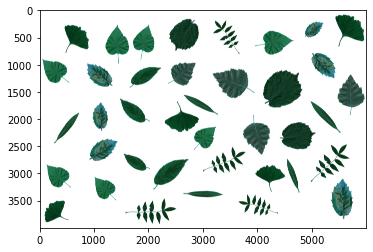

(4000, 6000, 3)


In [4]:
plt.imshow(im0)
plt.show()
print(np.shape(im0))

In [37]:
#dicionário que define as 8 posíveis posições de um vizinho, iniciando pelo vizinho à esquerda
neighbors = {
    "n_1": [ 0,-1],
    "n_2": [-1,-1],
    "n_3": [-1, 0],
    "n_4": [-1, 1],
    "n_5": [ 0, 1],
    "n_6": [ 1, 1],
    "n_7": [ 1, 0],
    "n_8": [ 1,-1]
}

In [38]:
# função para buscar no dicionário em qual posição "neig" está em relação a "center"
def find_n(center, neig):
    cont_n = 1
    while not np.array_equal(neig, center + neighbors["n_"+str(cont_n)]):
        if cont_n==8:
            cont_n=1
        else:
            cont_n+=1
    return cont_n

In [39]:
# passos 3 a 5 do Agoritmo Seguidor de Fronteira
def frontier_explorator(b, c, matrix, b_0, frontier):
    # flag booleana que determina se o laço deve continuar. Torna-se verdadeira quando b=b_0
    back_to_beginning = False

    while not back_to_beginning:
        # verifica qual o n do c atual
        cont_n = find_n(b, c)
        
        # incrementa n para começar a olhar para o próximo vizinho
        cont_n+=1
        # nk = próximo vizinho
        nk = b + neighbors["n_"+str(cont_n)]

        # se o próximo vizinho já é o desejado, o próximo laço não é ocorre. A variável walk determina se o laço foi acessado ou não, a fim de realizar as correções posteriores da variável
        walk = False    
        
        # laço busca o próximo pixel vizinho que não é branco
        while matrix[nk[0], nk[1]] == WHITE:
            walk = True
            nk = b + neighbors["n_"+str(cont_n)]
            if cont_n==8:
                cont_n=1
            else:
                cont_n+=1
        
        # se o laço anterior foi acessado, é preciso decrementar cont_n
        if walk:
            if cont_n!=1:
                cont_n-=1
            else:
                cont_n=8

        # cria a variável "k_minus_1", que guarda o índice do vizinho anterior
        if cont_n != 1:
            k_minus_1 = cont_n-1
        else:
            k_minus_1 = 8

        # c corresponde ao vizinho anterior, b corresponde ao vizinho de valor 1
        c = b + neighbors["n_"+str(k_minus_1)]
        b = nk

        # joga o valor de b pra lista de pixels da fronteira
        frontier += [b]

        # verifica se b já voltou pro começo pra continuar a percorrer a fronteira
        if np.array_equal(b,b_0):
            back_to_beginning = True

    return frontier

In [41]:
# inicia o Algoritmo Seguidor de Fronteira com os Passos 1 e 2
def frontier_finder(b_0, matrix):
    height = np.shape(matrix)[0]
    width  = np.shape(matrix)[1]

    # percorre os pixels brancos da imagem até encontrar o primeiro pixel não-branco
    while matrix[b_0[0], b_0[1]]==WHITE:
        if b_0[1]!= width-1:
            b_0+=[0,1]
        else:
            if b_0[0]==height-1:
                return
            b_0+=[1,-width+1]

    # define c como o vizinho da esquerda do primeiro pixel não-branco
    c = b_0 + neighbors["n_1"]

    # procura o primeiro vizinho não branco para ser o próximo c
    cont_n = 1
    while matrix[c[0], c[1]] == WHITE:
        c = b_0 + neighbors["n_"+str(cont_n)]
        if cont_n==8:
            cont_n=1
        else:
            cont_n+=1

    # passa o valor do atual pixel não-branco (c) para b, e passa o valor de b_0 para c
    b, c = c, b_0
    
    # adiciona b_0 e b para a lista de pixels percorridos
    frontier = [b_0, b] 
    frontier = frontier + frontier_explorator(b, c, matrix, b_0, frontier)

    return frontier

In [34]:
height = np.shape(teste)[0]
width = np.shape(teste)[1]

b_0 = [0, 1]

In [64]:
teste = np.array([[0,0,0,0,0,0,0],
                  [0,0,1,1,1,1,0],
                  [0,1,1,1,1,0,0],
                  [0,1,1,1,1,1,0],
                  [0,1,1,1,1,1,0],
                  [0,1,1,1,1,0,0],
                  [0,0,0,0,0,0,0]])

In [66]:
# chama o algoritmo seguidor de fronteira e armazena sua fronteira em "frontier"
frontier = frontier_finder(np.array([0,1]), teste)

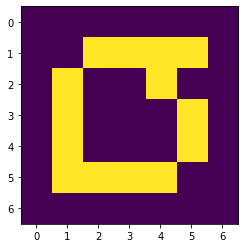

In [67]:
res = np.zeros((height, width))
for f in frontier:
    res[f[0], f[1]] = 1
plt.imshow(res)
plt.show()

In [42]:
print(frontier)

[array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([2, 4]), array([3, 4]), array([4, 4]), array([5, 4]), array([5, 3]), array([5, 2]), array([5, 1]), array([4, 1]), array([3, 2]), array([2, 1]), array([1, 2]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([2, 4]), array([3, 4]), array([4, 4]), array([5, 4]), array([5, 3]), array([5, 2]), array([5, 1]), array([4, 1]), array([3, 2]), array([2, 1]), array([1, 2])]


In [93]:
#while percorre pixels brancos até achar o primeiro não branco
while teste[b_0[0], b_0[1]]==0:
    if b_0[1]!= width-1:
        b_0+=[0,1]
    else:
        b_0+=[1,-width+1]
print(b_0)

[1 2]


In [94]:
c_0 = b_0 - [0,1]
print(c_0)

[1 1]


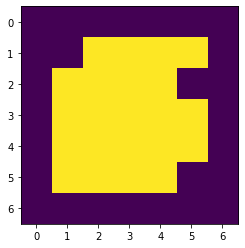

(7, 7)


In [65]:
plt.imshow(teste)
plt.show()
print(np.shape(teste))